In [1]:
import os
import pandas as pd


In [2]:
FAKE_DIR=r"D:\Placement_Projects\FinalYear\Multilingual\Gujarati_fake_news"
REAL_DIR=r"D:\Placement_Projects\FinalYear\Multilingual\Gujarati_real_news"
data=[]



In [3]:
 #for fake 1
for filename in os.listdir(FAKE_DIR):
    if filename.endswith(".txt"):
        with open(os.path.join(FAKE_DIR, filename), "r", encoding="utf-8") as f:
            text = f.read().strip()
            data.append([text, 1])

In [4]:
# for real 0
for filename in os.listdir(REAL_DIR):
    if filename.endswith(".txt"):
        with open(os.path.join(REAL_DIR, filename), "r", encoding="utf-8") as f:
            text = f.read().strip()
            data.append([text, 0])

df = pd.DataFrame(data, columns=["input_text", "target"])

In [5]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# shuffle


In [7]:
df.head()

,input_text,target
0,ભગવાન કાંઈ લાકડી લઈને મારતો નથી\n\n ભગવાન કાંઈ...,0
1,સ્થળાંતર કરનારાઓ પર હુમલોના બનાવટી સમાચાર પર દ...,1
2,શું રાહુલ ગાંધી જોખમમાં દર્દીઓને મળવા પહોંચ્યા...,1
3,ચાઇનામાં બોઇંગ 737 વિમાન દુર્ઘટના તરીકે ફ્લાઇટ...,1
4,"/ જસ્ટિન ટ્રુડોએ ફરી જીત પર કહ્યું, વધુ સારા દ...",0


In [46]:
df.shape

(17658, 6)

In [8]:
df['target'].value_counts()

target
1    8858
0    8800
Name: count, dtype: int64

In [9]:
# EDA
import nltk

In [10]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\ANKON
[nltk_data]     BANERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\ANKON
[nltk_data]     BANERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
df['input_text'].apply(len)

0         960
1        4276
2        2542
3        2230
4        2612
         ... 
17653    2359
17654    1177
17655    3850
17656    4416
17657    1936
Name: input_text, Length: 17658, dtype: int64

In [11]:
import re

df['num_characters'] = df['input_text'].str.len()

df['num_words'] = df['input_text'].apply(lambda x: len(str(x).split()))

df['num_sentences'] = df['input_text'].apply(lambda x: len(re.split(r'[.!?।]', str(x))))

In [12]:
df.head()

,input_text,target,num_characters,num_words,num_sentences
0,ભગવાન કાંઈ લાકડી લઈને મારતો નથી\n\n ભગવાન કાંઈ...,0,960,164,15
1,સ્થળાંતર કરનારાઓ પર હુમલોના બનાવટી સમાચાર પર દ...,1,4276,635,35
2,શું રાહુલ ગાંધી જોખમમાં દર્દીઓને મળવા પહોંચ્યા...,1,2542,421,39
3,ચાઇનામાં બોઇંગ 737 વિમાન દુર્ઘટના તરીકે ફ્લાઇટ...,1,2230,341,27
4,"/ જસ્ટિન ટ્રુડોએ ફરી જીત પર કહ્યું, વધુ સારા દ...",0,2612,429,27


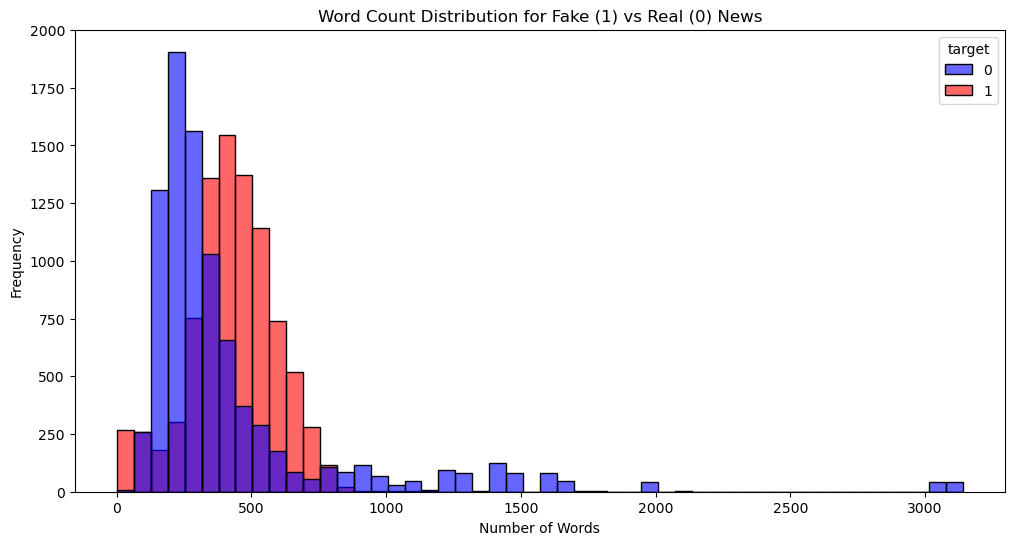

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(data=df, x="num_words", hue="target",
             bins=50, kde=False, palette=["blue", "red"], alpha=0.6)
plt.title("Word Count Distribution for Fake (1) vs Real (0) News")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

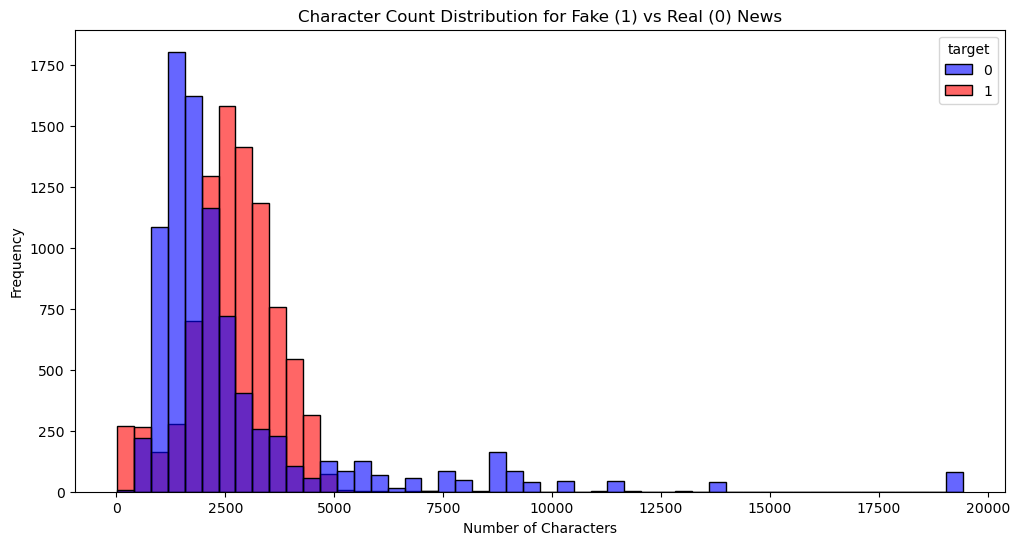

In [15]:


plt.figure(figsize=(12,6))
sns.histplot(data=df, x="num_characters", hue="target",
             bins=50, kde=False, palette=["blue", "red"], alpha=0.6)
plt.title("Character Count Distribution for Fake (1) vs Real (0) News")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

In [16]:
corr = df[['num_characters','num_words','num_sentences','target']].corr()
corr


,num_characters,num_words,num_sentences,target
num_characters,1.000000,0.996761,0.887291,-0.011132
num_words,0.996761,1.000000,0.888132,0.005933
num_sentences,0.887291,0.888132,1.000000,-0.091505
target,-0.011132,0.005933,-0.091505,1.000000


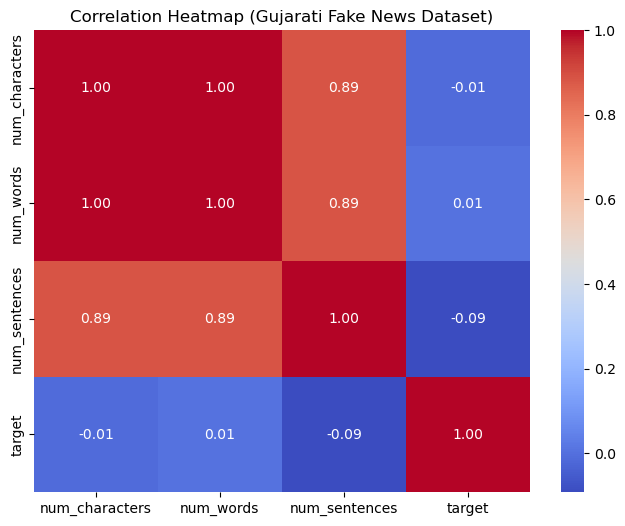

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Gujarati Fake News Dataset)")
plt.show()

In [24]:
gujarati_stopwords = set([
    "અને","માં","આ","તે","પર","ના","ની","ને","કે","તો","પણ","હતું","હતી","હતા","હે","છે",
    "છો","છુ","થઈ","થયું","થયો","થઈ","જો","જ્યારે","આવ્યું","આપે","એક","કર્યું","કરે",
    "કરવા","કરવાનુ","કરવામાં","અત્યાર","પછી","સાથે","વધુ","સર્વે","વર્ષ","કારણકે",
    "થઇ","બાદ","જે","જેવું","જેમ","કહેવાયું","કહ્યું","કહેવામાં","હતો","હતી","હતા",
    "યાનું","યાની","યાના","આવું","આવી","આવે","બહુ","એ","એમ","તેમ","તેમણે","તેમનો",
    "તેમને","તેમની","આમાંથી","જોતા","કયું","કઈ","કયા","કોઈ","નથી","હોતું","હોતો",
    "હોતી","હોવા","કરવાનો","આમ","આજે","અહીં","અહીંથી","પ્રતિ","બંને","સભ્ય","માત્ર",
    "વચ્ચે","હાલમાં","બાબત","લાગી","લાગ્યું","લાગતા","માટે","કારણ","જોયું","જોડાઈ"
])


In [27]:
import re
import regex


In [28]:

def transform_text(text):
    
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove emojis
    text = regex.sub(r"[\p{Emoji}\p{Emoji_Presentation}\p{Extended_Pictographic}]", " ", text)

    # Keep only Gujarati characters and spaces
    text = regex.sub(r"[^\p{Gujarati}\s]", " ", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize
    words = text.split()

    # Remove stopwords
    words = [w for w in words if w not in gujarati_stopwords]

    # Remove very small words
    words = [w for w in words if len(w) > 2]

    return " ".join(words)

In [31]:
df["clean_text"] = df["input_text"].apply(transform_text)

In [32]:
df.sample(7)

,input_text,target,num_characters,num_words,num_sentences,clean_text
3598,"ના, નિયાએ 'મુસ્લિમ આતંકવાદીઓ' ની જાણ કરવા માટે...",1,3730,577,39,નિયાએ મુસ્લિમ આતંકવાદીઓ જાણ હેલ્પલાઈન નંબર જાર...
7071,આરએસએસ પરની માંગણી કરનારી જુમ્મા કાર્યકર્તાનો ...,1,2669,443,26,આરએસએસ પરની માંગણી કરનારી જુમ્મા કાર્યકર્તાનો ...
6426,શું ભારતીય મહિલાઓની બાસ્કેટબ team લ ટીમે FIBA ...,1,3079,485,30,શું ભારતીય મહિલાઓની બાસ્કેટબ ટીમે એશિયા જીત્યો...
13926,શેખરને ‘ઉત્સવ’ નો આનંદ ના રહ્યો\n\n શેખર સુમનન...,0,2566,434,37,શેખરને ઉત્સવ આનંદ રહ્યો શેખર સુમનનું નસીબ એટલુ...
7156,આતંકવાદી હુમલો નિષ્ફળ થતાં ગુજરાતના સ્ટેશન વાય...,1,1896,289,24,આતંકવાદી હુમલો નિષ્ફળ થતાં ગુજરાતના સ્ટેશન વાય...
8827,"અસંબંધિત છબીઓ, વીડિયો વાયરલ થાય છે જેમ કે અમૃત...",1,3357,507,36,અસંબંધિત છબીઓ વીડિયો વાયરલ થાય અમૃતસર ટ્રેન ડ્...
17414,ભયંકર/ માનવ ખોપરી મોઢામાં દબાવીને લઇ જઈ રહ્યો ...,0,1368,226,13,ભયંકર માનવ ખોપરી મોઢામાં દબાવીને રહ્યો શ્વાન પ...


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1,2),
)

X = tfidf.fit_transform(df["clean_text"])
y = df["target"]

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [36]:
models = {
    "SVC": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}


In [37]:
accuracy_results = {}
f1_results = {}

In [38]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    accuracy_results[name] = acc
    f1_results[name] = f1

Training SVC...
Training Logistic Regression...
Training Naive Bayes...
Training Random Forest...
Training Decision Tree...
Training KNN...
Training XGBoost...


In [40]:
result_table = pd.DataFrame({
    "Model": list(accuracy_results.keys()),
    "Accuracy": list(accuracy_results.values()),
    "F1 Score": list(f1_results.values())
})

In [41]:
result_table

,Model,Accuracy,F1 Score
0,SVC,0.991789,0.991815
1,Logistic Regression,0.988675,0.988701
2,Naive Bayes,0.982729,0.982860
3,Random Forest,0.989807,0.989836
4,Decision Tree,0.954134,0.954443
5,KNN,0.624009,0.726749
6,XGBoost,0.989524,0.989563


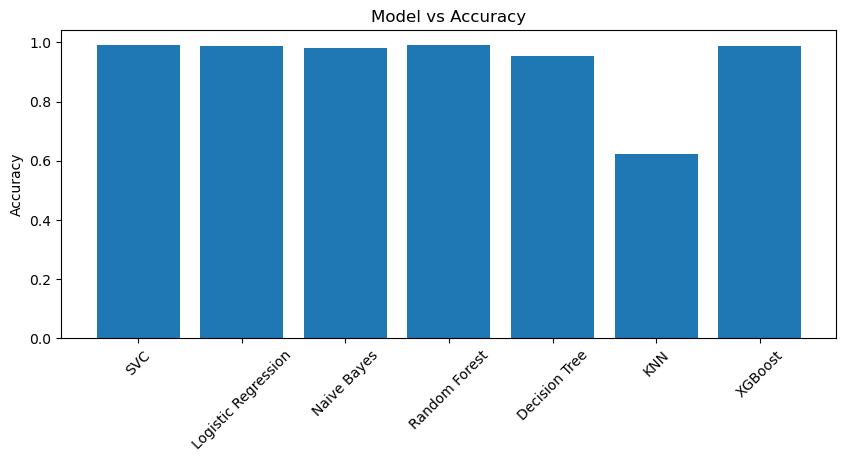

In [42]:
plt.figure(figsize=(10, 4))
plt.bar(result_table["Model"], result_table["Accuracy"])
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model vs Accuracy")
plt.show()

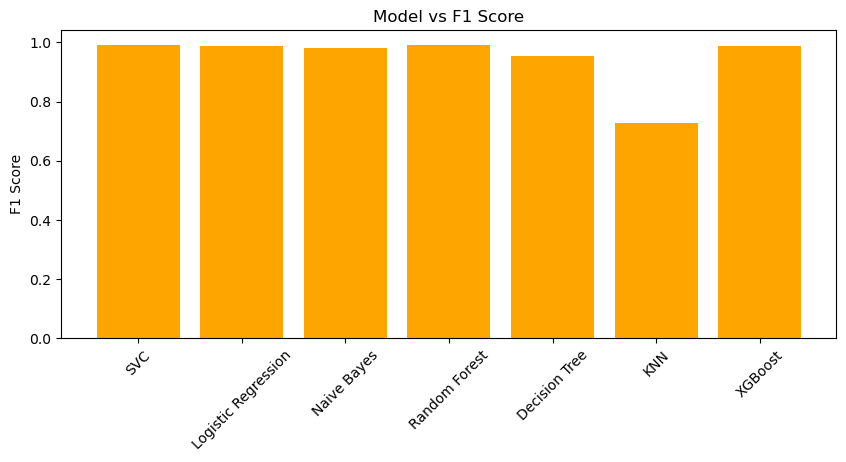

In [43]:
plt.figure(figsize=(10, 4))
plt.bar(result_table["Model"], result_table["F1 Score"], color="orange")
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.title("Model vs F1 Score")
plt.show()

In [44]:
def predict_fake_news(text):
    # Step 1: Clean the text
    cleaned = transform_text(text)

    # Step 2: Transform with TF-IDF
    vector = tfidf.transform([cleaned])

    # Step 3: Predict
    pred = model.predict(vector)[0]

    # Step 4: Probability (only for LR, RF, XGBoost)
    try:
        proba = model.predict_proba(vector)[0][1]
    except:
        proba = None

    # Step 5: Output
    if pred == 1:
        return "FAKE NEWS", proba
    else:
        return "REAL NEWS", proba


In [45]:
text = "ગુજરાતમાં ચૂંટણી અંગે ખોટા સમાચાર સોશિયલ મીડિયા પર વાયરલ થયા..."
predict_fake_news(text)


('FAKE NEWS', np.float32(0.8340905))